# 3D Eye-Tracking Scene Visualization

This notebook demonstrates a single 3D scene visualization of the eye-tracking system with zero rotation, showing the spatial relationship between eyes, cameras, and LEDs.

## Imports and Setup

In [140]:
%matplotlib widget

import seet.device as device
import seet.scene as scene
import seet.user as user
import seet.visualization.scene_visualization as scene_visualization
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import sys
sys.path.append("..")
import utils

dropdown_widget = utils.get_experiment_info(save_results=False)

RadioButtons(description='Device:', options=('default',), value='default')

## Create Scene Model

In [141]:
# Create a scene
scene_file_name, _ = \
    utils.get_configuration_files(dropdown_widget.value)  # type: ignore

et_scene = scene.SceneModel(parameter_file_name=scene_file_name)

print(f"Scene loaded from: {scene_file_name}")
print(f"Number of eyes: {len(et_scene.user.eyes)}")
print(f"Number of subsystems: {len(et_scene.device.subsystems)}")

Scene loaded from: C:\Users\padossa\repos\seet-1\seet\scene\default_scene/default_scene.json
Number of eyes: 2
Number of subsystems: 2


## 3D Scene Visualization (Zero Rotation)

Display the 3D eye-tracking scene with no gaze rotation (0°, 0°).

Natural content aspect ratio: 1.000
Setting figure to 252 x 252 pt (3.500 x 3.500 inches)
Figure saved as: 3D_scene_visualization.pdf
Final dimensions: 252 x 252 pt


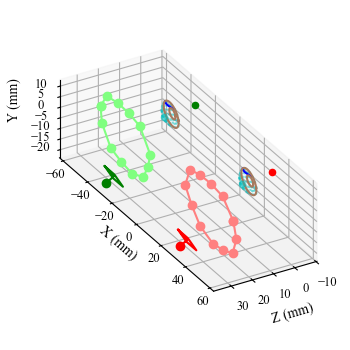

In [142]:
# Create a figure with default size initially
fig = plt.figure()

# Zero rotation angles (rotation around x, rotation around y)
angles = (0.0, 0.0)

# Apply rotation to eyes
for eye in et_scene.user.eyes:
    eye.rotate_from_gaze_angles_inParent(angles)

# Create 3D axes with larger left margin for Y label
axs_3D = plt.axes(
    # [0.15, 0.08, 0.77, 0.84],  # [left, bottom, width, height] - larger left margin for Y label
    [0.05, -0.0, 0.95, 1],
    projection="3d",
    proj_type="ortho",
    computed_zorder=True
)

# Set view angle
axs_3D.view_init(azim=60, elev=30, vertical_axis="y")

# Set font properties for Times font
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10  # Exactly 10pt as requested

# Visualize the scene
et_scene_visualization = \
    scene_visualization.SceneModelVisualization(
        et_scene, axs_3D, visualization_node=et_scene
    )

et_scene_visualization.visualize()

# Set axis labels with exactly 10pt font size, positioned close to axes
axs_3D.set_xlabel("X (mm)", fontsize=10, labelpad=1)
axs_3D.set_ylabel("Y (mm)", fontsize=10, labelpad=1)
axs_3D.set_zlabel("Z (mm)", fontsize=10, labelpad=1)

# Set tick labels with 9pt font size, positioned close to axes
axs_3D.tick_params(labelsize=9, pad=1)

# NOW determine figure size based on content and set to 252pt width
# Let matplotlib determine the natural aspect ratio from the 3D content
fig.canvas.draw()  # Force rendering to determine natural size
bbox = axs_3D.get_tightbbox(fig.canvas.get_renderer())
if bbox:
    natural_aspect = bbox.width / bbox.height
    print(f"Natural content aspect ratio: {natural_aspect:.3f}")
else:
    natural_aspect = 1.0  # fallback

# Set figure to 252pt width, height determined by natural aspect ratio
width_pt = 252
height_pt = width_pt / natural_aspect
width_in = width_pt / 72
height_in = height_pt / 72

print(f"Setting figure to {width_pt} x {height_pt:.0f} pt ({width_in:.3f} x {height_in:.3f} inches)")
fig.set_size_inches(width_in, height_in, forward=True)

# Reset rotation
for eye in et_scene.user.eyes:
    eye.unrotate_from_gaze_angles_inParent(angles)

# Save as PDF with exact figure dimensions (no bbox_inches='tight' to preserve margins)
pdf_filename = "3D_scene_visualization.pdf"
fig.savefig(pdf_filename, format='pdf',
           facecolor='white', edgecolor='none', dpi=300)
print(f"Figure saved as: {pdf_filename}")
print(f"Final dimensions: {width_pt} x {height_pt:.0f} pt")